In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pothole= pd.read_csv('data/인천포트홀.csv')

pothole=pothole[['region_id','date']]
pothole['count']=1
pothole['date'] = pd.to_datetime(pothole['date'])
# pothole = pothole.reset_index()
pothole = pothole.groupby(['date','region_id']).sum()
pothole

count
date       region_id       
2021-08-11 2301058        1
           2304054        1
           2304055        1
           2304057        1
           2304058        3
...                     ...
2021-10-26 2305067        2
           2305074        1
           2308051        1
           2308078        1
           3105092        1

[745 rows x 1 columns]

In [3]:
weather=pd.read_csv('data/인천날씨_0702.csv')
weather['date'] = pd.to_datetime(weather['date'])
weather=weather.set_index(['date','region_id'])
# weather['aqua'].unique()
# weather = weather.reset_index()
weather

,,temp_max,temp_min,temp_avg,hum_avg,hum_min,aqua_sum,aqua_3d,aqua_3d_TF,hum_max
date,region_id,,,,,,,,,
2021-01-01,2301052,1.2,-7.3,-2.95,48.12,29.0,0.0,0.0,False,70.0
2021-01-02,2301052,-2.2,-7.5,-4.83,42.21,31.0,0.0,0.0,False,50.0
2021-01-03,2301052,-2.1,-6.5,-4.60,36.38,25.0,0.0,0.0,False,41.0
2021-01-04,2301052,0.2,-6.0,-2.20,55.50,33.0,0.0,0.0,False,75.0
2021-01-05,2301052,-4.1,-10.4,-7.46,44.29,29.0,0.0,0.0,False,59.0
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,2332037,-1.0,-4.8,-2.40,89.67,70.0,1.0,0.0,False,96.0
2021-12-28,2332037,6.3,-1.6,1.97,85.46,71.0,0.0,1.0,True,96.0
2021-12-29,2332037,6.9,-2.4,1.81,58.50,37.0,0.0,1.0,True,81.0


In [4]:
merge = pd.merge(pothole, weather, how='inner', left_index=True, right_index=True)
# merge['count']=merge['count'].fillna(0)
# merge =merge.query('"2021-08-11"<= date <= "2021-10-26"')
merge =merge.reset_index()
merge['temp_diff'] = merge.apply(lambda x: abs(x['temp_max']-x['temp_min']),axis=1)
merge

,date,region_id,count,temp_max,temp_min,temp_avg,hum_avg,hum_min,aqua_sum,aqua_3d,aqua_3d_TF,hum_max,temp_diff
0,2021-08-11,2301058,1,30.0,24.4,26.60,68.29,50.0,0.6,22.3,True,80.0,5.6
1,2021-08-11,2304054,1,31.6,23.6,27.40,80.58,56.0,0.0,30.5,True,100.0,8.0
2,2021-08-11,2304055,1,31.6,23.6,27.40,80.58,56.0,0.0,30.5,True,100.0,8.0
3,2021-08-11,2304057,1,31.6,23.6,27.40,80.58,56.0,0.0,30.5,True,100.0,8.0
4,2021-08-11,2304058,3,31.6,23.6,27.40,80.58,56.0,0.0,30.5,True,100.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,2021-10-26,2304055,2,18.3,12.1,14.72,75.50,59.0,0.0,0.0,False,91.0,6.2
591,2021-10-26,2305067,2,18.0,10.0,13.02,84.42,55.0,0.5,0.0,False,99.0,8.0
592,2021-10-26,2305074,1,18.3,12.1,14.72,75.50,59.0,0.0,0.0,False,91.0,6.2
593,2021-10-26,2308051,1,17.8,10.7,13.70,79.54,58.0,0.0,0.0,False,96.0,7.1


In [5]:
merge.describe()

,region_id,count,temp_max,temp_min,temp_avg,hum_avg,hum_min,aqua_sum,aqua_3d,hum_max,temp_diff
count,5.950000e+02,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000
mean,2.305898e+06,1.915966,26.321849,18.488908,21.980924,77.915378,56.959664,6.716975,12.423025,94.013445,7.832941
std,2.797115e+03,1.648282,4.979949,5.746626,5.246327,10.714419,13.833001,17.380726,15.120912,7.591628,2.651800
min,2.301052e+06,1.000000,13.900000,2.200000,7.560000,52.210000,27.000000,0.000000,0.000000,65.000000,1.800000
25%,2.304057e+06,1.000000,25.800000,18.600000,22.750000,70.750000,46.000000,0.000000,0.000000,91.000000,5.800000
50%,2.305067e+06,1.000000,27.700000,20.500000,23.580000,78.380000,55.000000,0.000000,6.000000,97.000000,7.300000
75%,2.308064e+06,2.000000,30.000000,21.700000,24.920000,87.170000,68.000000,2.000000,21.500000,100.000000,9.900000
max,2.331040e+06,12.000000,32.200000,24.900000,27.410000,97.420000,88.000000,87.500000,63.000000,100.000000,13.800000


In [6]:
def temp_index(x):
    if x>21.980924:
        return 1
    return 0
    
def temp_diff(x,y):
    return abs(x-y)

def aqua_index(x):
    if x>6.716975:
        return 1
    return 0

def hum_index(x):
    if x>77.915378:
        return 1
    return 0
    
# def wind_index(x):
#     if x>1.24:
#         return 1
#     else:
#         return 0


In [25]:
merge['aqua_index']=merge['aqua_sum'].apply(lambda x: aqua_index(x))
merge['temp_index']=merge['temp_avg'].apply(lambda x: temp_index(x))
merge['hum_index']=merge['hum_avg'].apply(lambda x: hum_index(x))
merge['temp_diff']=merge.apply(lambda x: temp_diff(x['temp_max'], x['temp_min']),axis=1)
# merge['wind_index']=merge['wind_speed'].apply(lambda x: wind_index(x))
merge

,date,region_id,count,temp_max,temp_min,temp_avg,hum_avg,hum_min,aqua_sum,aqua_3d,aqua_3d_TF,hum_max,temp_diff,aqua_index,temp_index,hum_index
0,2021-08-11,2301058,1,30.0,24.4,26.60,68.29,50.0,0.6,22.3,True,80.0,5.6,0,1,0
1,2021-08-11,2304054,1,31.6,23.6,27.40,80.58,56.0,0.0,30.5,True,100.0,8.0,0,1,1
2,2021-08-11,2304055,1,31.6,23.6,27.40,80.58,56.0,0.0,30.5,True,100.0,8.0,0,1,1
3,2021-08-11,2304057,1,31.6,23.6,27.40,80.58,56.0,0.0,30.5,True,100.0,8.0,0,1,1
4,2021-08-11,2304058,3,31.6,23.6,27.40,80.58,56.0,0.0,30.5,True,100.0,8.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,2021-10-26,2304055,2,18.3,12.1,14.72,75.50,59.0,0.0,0.0,False,91.0,6.2,0,0,0
591,2021-10-26,2305067,2,18.0,10.0,13.02,84.42,55.0,0.5,0.0,False,99.0,8.0,0,0,1
592,2021-10-26,2305074,1,18.3,12.1,14.72,75.50,59.0,0.0,0.0,False,91.0,6.2,0,0,0
593,2021-10-26,2308051,1,17.8,10.7,13.70,79.54,58.0,0.0,0.0,False,96.0,7.1,0,0,1


In [18]:
_merge =  merge.set_index('date').groupby([pd.Grouper(freq='3D'),'region_id']).sum()
# _merge = _merge.groupby('date').sum()
_merge

,count,temp_max,temp_min,temp_avg,hum_avg,hum_min,aqua_sum,aqua_3d,aqua_3d_TF,hum_max,temp_diff,aqua_index,temp_index,hum_index
date,,,,,,,,,,,,,,
2021-08-11,40,1012.3,760.4,873.53,2513.76,1886.0,143.8,448.4,23,3050.0,251.9,4,33,9
2021-08-14,46,999.2,723.7,850.04,2022.61,1458.0,46.5,143.2,6,2633.0,275.5,3,32,0
2021-08-17,149,2190.9,1442.2,1756.88,5196.88,3386.0,903.6,1255.6,51,6951.0,748.7,53,72,23
2021-08-20,113,2033.0,1609.4,1806.27,5834.59,4712.0,1595.7,2110.9,73,6787.0,423.6,24,73,38
2021-08-23,56,592.8,487.3,532.91,1946.95,1594.0,61.5,628.5,22,2144.0,105.5,4,22,20
2021-08-26,133,1720.1,1352.9,1533.18,5716.80,4776.0,44.1,908.8,65,6302.0,367.2,0,46,56
2021-08-29,279,2507.3,1979.0,2184.30,8315.30,6637.0,1083.9,198.4,96,9248.0,528.3,14,82,80
2021-09-07,44,700.5,483.2,568.66,2101.49,1321.0,0.0,959.1,25,2468.0,217.3,0,24,22
2021-09-10,97,1586.0,1089.2,1310.85,4363.98,2895.0,0.0,255.5,25,5360.0,496.8,0,56,29


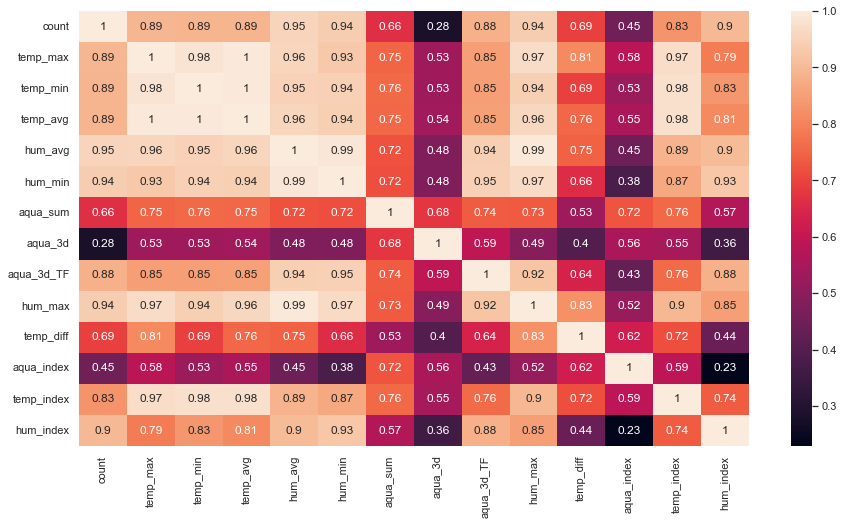

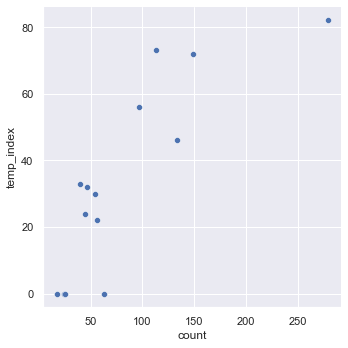

In [19]:
sns.heatmap(_merge.corr(), annot=True)
sns.set(rc={'figure.figsize':(20,8)})
sns.relplot(x='count', y='temp_index',data=_merge)

(434,)


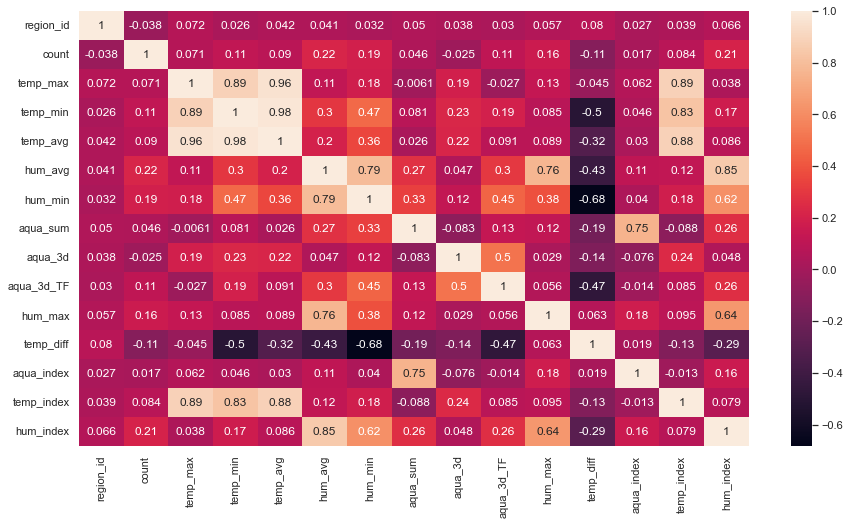

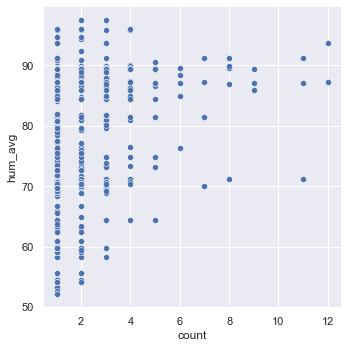

In [54]:

aqua3d_df = merge[merge['aqua_3d_TF']==True] 
# aqua3d_df = aqua3d_df[aqua3d_df['aqua_3d']>0]
print(aqua3d_df['aqua_3d'].shape)
# aqua3d_df=merge[:]
sns.set(rc={'figure.figsize':(15,8)})
# plt.title('temp_min<15', fontsize=20)
sns.heatmap(merge.corr(), annot=True)
sns.relplot(x='count', y='hum_avg',data=merge,sizes=(20,8))

In [ ]:
d3_merge =  merge.set_index('date').groupby([pd.Grouper(freq='3D'),'region_id']).sum()
d3_merge = d3_merge.groupby('date').sum()
d3_mergeb

,count,temp_max,temp_min,temp_avg,hum_avg,hum_min,aqua_sum,aqua_3d,aqua_3d_TF,hum_max,temp_diff,aqua_index,temp_index,hum_index
date,,,,,,,,,,,,,,
2021-08-11,40,1012.3,760.4,873.53,2513.76,1886.0,143.8,448.4,23,3050.0,251.9,4,33,9
2021-08-14,46,999.2,723.7,850.04,2022.61,1458.0,46.5,143.2,6,2633.0,275.5,3,32,0
2021-08-17,149,2190.9,1442.2,1756.88,5196.88,3386.0,903.6,1255.6,51,6951.0,748.7,53,72,23
2021-08-20,113,2033.0,1609.4,1806.27,5834.59,4712.0,1595.7,2110.9,73,6787.0,423.6,24,73,38
2021-08-23,56,592.8,487.3,532.91,1946.95,1594.0,61.5,628.5,22,2144.0,105.5,4,22,20
2021-08-26,133,1720.1,1352.9,1533.18,5716.80,4776.0,44.1,908.8,65,6302.0,367.2,0,46,56
2021-08-29,279,2507.3,1979.0,2184.30,8315.30,6637.0,1083.9,198.4,96,9248.0,528.3,14,82,80
2021-09-07,44,700.5,483.2,568.66,2101.49,1321.0,0.0,959.1,25,2468.0,217.3,0,24,22
2021-09-10,97,1586.0,1089.2,1310.85,4363.98,2895.0,0.0,255.5,25,5360.0,496.8,0,56,29


In [47]:
_merge = merge
_merge['gugun'] = merge['region_id'].apply(lambda x:str(x)[2:4])

_merge_count = _merge.groupby(['gugun','date'])[['count']].sum()
_merge_mean = _merge.groupby(['gugun','date']).mean()
_merge_group = _merge_mean
_merge_group['count']=_merge_count
del _merge_group['region_id']
_merge_group =_merge_group.reset_index()
_merge_group= _merge_group[_merge_group['gugun']=='01']
_merge_group

,gugun,date,count,temp_max,temp_min,temp_avg,hum_avg,hum_min,aqua_sum,aqua_3d,aqua_3d_TF,hum_max,temp_diff,aqua_index,temp_index,hum_index
0,01,2021-08-11,1,30.00,24.400000,26.600000,68.290000,50.0,0.6,22.3,1.0,80.0,5.600000,0.0,1.0,0.000000
1,01,2021-08-17,9,30.30,20.033333,23.816667,74.693333,44.0,27.2,27.5,1.0,94.0,10.266667,1.0,1.0,0.333333
2,01,2021-08-20,2,28.90,22.700000,25.430000,84.710000,73.0,2.5,32.0,1.0,94.0,6.200000,0.0,1.0,1.000000
3,01,2021-08-29,5,25.20,21.700000,23.310000,73.880000,64.0,0.0,1.6,1.0,82.0,3.500000,0.0,1.0,0.000000
4,01,2021-08-30,6,26.85,22.600000,24.080000,70.620000,58.0,0.0,1.3,1.0,82.0,4.250000,0.0,1.0,0.000000
5,01,2021-09-10,2,27.00,21.100000,23.590000,71.670000,51.0,0.0,5.0,1.0,88.0,5.900000,0.0,1.0,0.000000
6,01,2021-09-11,1,27.00,20.200000,23.470000,63.000000,51.0,0.0,0.0,0.0,77.0,6.800000,0.0,1.0,0.000000
7,01,2021-10-19,2,14.20,5.200000,9.310000,52.250000,39.0,0.0,7.0,1.0,73.0,9.000000,0.0,0.0,0.000000
8,01,2021-10-21,1,14.70,6.700000,10.250000,52.210000,35.0,0.0,7.0,1.0,65.0,8.000000,0.0,0.0,0.000000


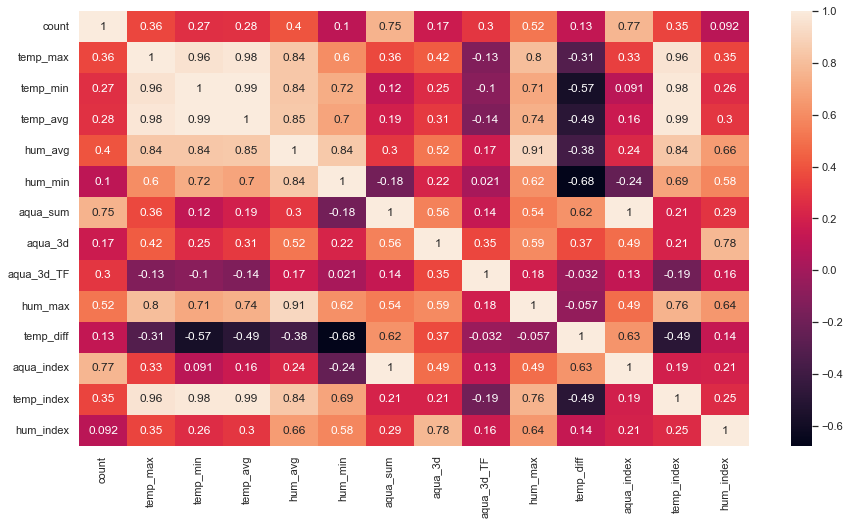

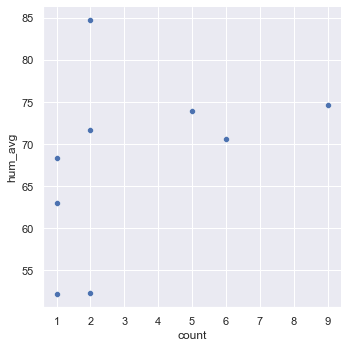

In [49]:
sns.set(rc={'figure.figsize':(15,8)})
# plt.title('temp_min<15', fontsize=20)
sns.heatmap(_merge_group.corr(), annot=True)
sns.relplot(x='count', y='hum_avg',data=_merge_group,sizes=(20,8))